# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import simplejson as json
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
request_BTC_data = requests.get(btc_url).json()
btc_price = request_BTC_data['data']['1']["quotes"]['USD']['price']

In [6]:
# Fetch current ETH price
request_ETH_data = requests.get(eth_url).json()
ETH_price = request_ETH_data['data']['1027']['quotes']['USD']['price']


In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * ETH_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69502.80
The current value of your 5.3 ETH is $10924.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

NameError: name 'alpaca' is not defined

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

NameError: name 'df_portfolio' is not defined

In [12]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

NameError: name 'agg_close_price' is not defined

### Savings Health Analysis

In [57]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
saving_data = [my_btc_value + my_eth_value, my_agg_value + my_btc_value]

df_savings = pd.DataFrame({"amount":saving_data},index = ["crypto","shares"])

# Display savings DataFrame
df_savings

,amount
crypto,78269.328
shares,92557.000


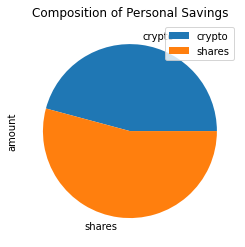

In [58]:
# Plot savings pie chart
df_savings.plot.pie(x="shares", y="amount", title = "Composition of Personal Savings");

In [63]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savingst
total_saving = df_savings['amount'].sum()

# Validate saving health
if total_saving > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_saving < emergency_fund:
    print("Sorry! You dont have enought money in your emergency fund")
else:
    print("Okay! You are extachly at your mergency fund")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [64]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-21', tz='America/New_York').isoformat()

In [67]:
# Get 5 years' worth of historical data for SPY and AGG
df_historical_data = alpaca.get_barset(tickers, timeframe,start = start_date, end = end_date).df

# Display sample data
df_historical_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602  326.91   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417  328.28   

                                                                 
                               high     low    close     volume  
time                                                             
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.09  329.990   74362731  
2020-10-30 00:00:00-04:00  329.6900  322.60  326.530   93413096

In [73]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_historical_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5)

In [74]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [75]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004723,0.992532,1.004437,0.998238,1.004243,0.997318,1.000920,1.004382,0.999880,0.998904,...,1.000267,0.994885,1.001024,0.999409,0.997001,0.995446,0.992385,0.998743,1.003096,1.002655
2,1.008836,1.003612,1.005988,1.000358,0.999750,0.998298,1.005194,0.999156,1.001660,0.996600,...,1.006055,0.995409,1.007633,1.003035,0.997648,0.990984,0.988922,0.994814,1.000896,1.001909
3,1.006258,1.002051,1.008360,0.997160,1.002431,0.997445,1.005483,1.002274,1.010225,1.000437,...,1.006227,0.993009,1.010075,1.004521,0.998892,0.996758,0.986594,0.999964,1.004777,0.997615
4,1.002954,1.008500,1.001807,1.002982,0.999702,0.998034,1.011535,1.005020,1.001495,1.003433,...,1.000552,0.993438,1.011907,1.008891,0.994368,0.996974,0.981017,1.000859,1.001081,1.003075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.519520,1.287179,1.757516,1.430404,1.654361,1.979910,1.510506,2.197961,1.447531,1.565484,...,1.172768,1.432347,1.563114,1.247664,1.722615,1.686429,1.317342,1.959268,1.301696,1.664832
1257,1.513288,1.294397,1.752601,1.436706,1.660481,1.986017,1.511186,2.200312,1.443773,1.563742,...,1.163685,1.428829,1.566161,1.249443,1.724556,1.684833,1.317416,1.958030,1.302028,1.672827
1258,1.504736,1.287458,1.754127,1.442312,1.678616,1.995201,1.509714,2.200068,1.456664,1.558198,...,1.163644,1.434056,1.568317,1.254963,1.725557,1.694847,1.319130,1.958679,1.310441,1.677276
1259,1.505126,1.291270,1.759643,1.451316,1.673899,1.992494,1.511583,2.194203,1.458331,1.563403,...,1.162627,1.423675,1.567128,1.263075,1.729981,1.693048,1.317767,1.955098,1.308125,1.674602


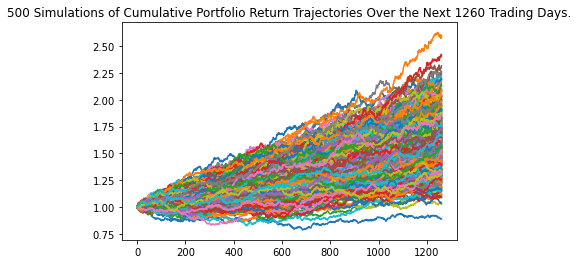

In [76]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

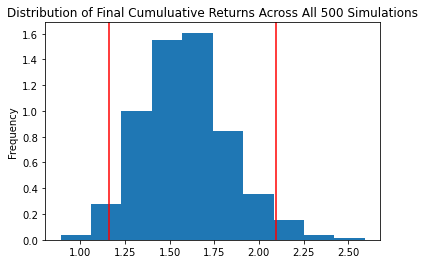

In [79]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.591771
std               0.246436
min               0.888837
25%               1.416374
50%               1.576838
75%               1.731813
max               2.593478
95% CI Lower      1.161102
95% CI Upper      2.098190
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [81]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23222.04 and $41963.8


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_new,2)
ci_upper = round(tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $34833.06 and $62945.69


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [87]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_historical_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_5year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [88]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008099,1.001226,0.998728,1.002243,0.996668,0.993986,0.998873,1.001341,1.000829,1.005146,...,1.004681,0.999843,0.996236,0.996833,1.001999,0.999416,1.000923,1.001179,0.998801,0.998242
2,1.007266,1.000675,1.003969,1.005322,0.997313,0.985617,0.997075,1.002009,0.998511,1.004893,...,0.997003,1.001382,0.992935,0.998097,1.003008,0.998094,0.999909,1.001263,0.993372,0.995199
3,0.994903,1.002018,1.006291,1.005675,0.996762,0.994468,0.999737,1.004776,0.992795,1.000754,...,0.999768,1.005306,0.996687,0.998075,1.003136,1.002420,0.998677,0.998859,0.992382,0.991611
4,0.990189,1.003633,1.007735,1.007090,0.994899,0.991179,1.000747,1.010563,0.993181,1.008221,...,0.998550,1.010239,0.997612,0.998785,1.001086,1.006266,1.004473,1.005366,0.997602,0.993145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.453235,1.329244,1.516195,1.444711,1.567969,1.498747,2.032753,1.287340,1.381942,1.410541,...,1.444033,1.758216,1.453027,1.641949,1.290811,1.892859,1.288930,2.153289,1.016754,2.112340
1257,1.462762,1.333052,1.508591,1.445244,1.571549,1.484557,2.017266,1.271100,1.391755,1.403153,...,1.438305,1.763513,1.451073,1.637283,1.285829,1.903867,1.286223,2.145173,1.024506,2.107675
1258,1.466457,1.337198,1.517013,1.436389,1.570612,1.480050,2.011612,1.271964,1.397459,1.403138,...,1.438896,1.765409,1.452969,1.639049,1.283413,1.898142,1.281175,2.142541,1.019522,2.103158
1259,1.472231,1.339183,1.522766,1.434358,1.572244,1.482564,2.020866,1.270717,1.405599,1.397434,...,1.442087,1.761374,1.456688,1.650012,1.283370,1.906001,1.280966,2.130778,1.028104,2.088987


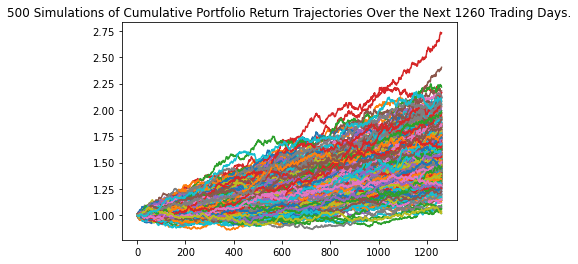

In [89]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

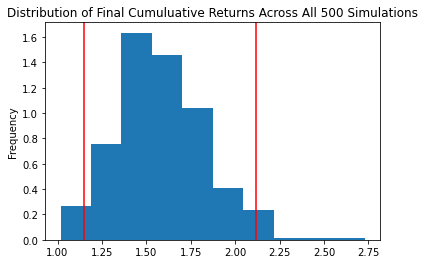

In [90]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()

In [91]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.580961
std               0.246435
min               1.016976
25%               1.407599
50%               1.566964
75%               1.749698
max               2.729804
95% CI Lower      1.147858
95% CI Upper      2.114990
Name: 1260, dtype: float64


In [93]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*initial_investment_five,2)
ci_upper_five= round(tbl_5[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $68871.46 and $126899.4


### Ten Years Retirement Option

In [94]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_historical_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_10years.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [97]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991162,0.994727,1.000754,1.011754,1.000613,1.003057,1.006777,1.001661,0.993116,1.004991,...,1.001841,1.003259,0.992729,0.995766,1.003622,0.997978,1.006906,0.999713,1.002684,1.009873
2,0.982614,0.995478,1.009879,1.020518,1.002173,1.006436,1.007500,0.994715,0.989847,1.006032,...,1.007873,1.003846,0.990092,0.999572,0.991678,1.005706,1.006216,1.008183,1.000097,1.014130
3,0.976835,0.996972,1.011362,1.026020,0.989616,1.008865,1.010758,1.004221,0.994509,1.008414,...,1.008938,1.014778,0.994532,0.994582,0.992752,1.002051,0.995258,1.006228,1.007220,1.026818
4,0.976036,0.997518,1.004606,1.031525,0.998228,1.009536,1.005851,1.012289,1.001880,1.017524,...,1.006119,1.016369,0.998978,0.997770,0.998187,0.998783,1.001133,1.003556,1.009404,1.023820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.056082,2.728531,6.035215,4.745215,5.044542,4.512574,6.598200,5.560275,7.832560,5.019777,...,4.652370,4.808234,6.075752,9.447132,5.660951,6.103099,6.746273,6.327132,4.036551,6.474861
2517,4.059683,2.734807,5.962863,4.732735,5.097942,4.515095,6.686868,5.570616,7.821165,4.993498,...,4.696386,4.836345,6.164526,9.481108,5.672433,6.143811,6.746000,6.318353,4.047084,6.422494
2518,4.051708,2.732184,5.961082,4.762822,5.079230,4.524966,6.567887,5.564149,7.819626,5.064411,...,4.655391,4.868516,6.158050,9.424438,5.662317,6.176745,6.758013,6.324570,4.066332,6.416818
2519,4.066863,2.720351,5.997980,4.715669,5.083084,4.495480,6.638393,5.564185,7.852277,5.115588,...,4.655506,4.906714,6.127282,9.550080,5.682125,6.161958,6.719647,6.334397,4.074769,6.382506


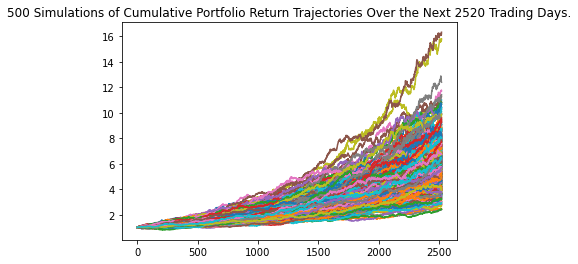

In [98]:
# Plot simulation outcomes
line_plot = MC_10years.plot_simulation()

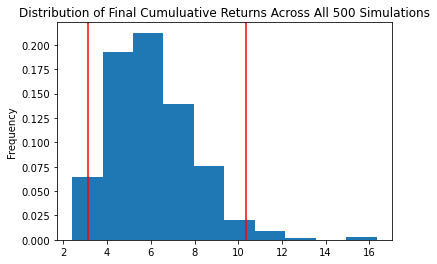

In [99]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10years.plot_distribution()

In [100]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten =MC_10years.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              6.062305
std               1.891588
min               2.397917
25%               4.681195
50%               5.890392
75%               7.142281
max              16.326351
95% CI Lower      3.118880
95% CI Upper     10.354342
Name: 2520, dtype: float64


In [101]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $187132.83 and $621260.52
